Data Exploration¶

Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import matplotlib.ticker as mtick

In [3]:

df = pd.read_csv(r"D:\Machine_Learning\Telco_churn\Data\raw\WA_Fn-UseC_-Telco-Customer-Churn (1).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Gender Distribution

Both genders look to be evenly distributed 

Text(0, 0.5, '% customer count')

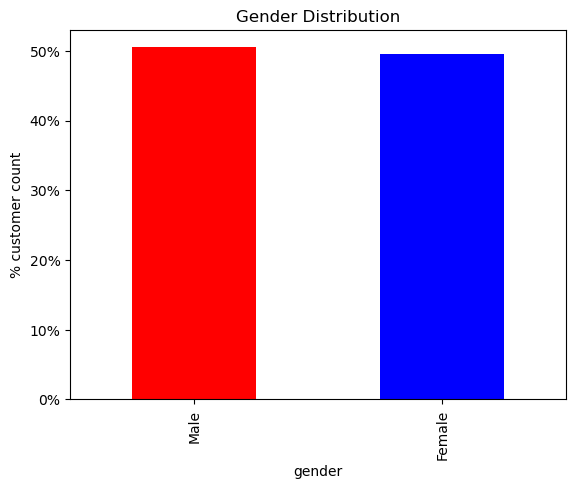

In [4]:
ax= (df['gender'].value_counts().sort_values( ascending=False)* 100/ len(df)).plot( kind= 'bar',
                                                                                    title= 'Gender Distribution' , color=['red', 'blue'])

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% customer count')

Text(0.5, 1.0, 'Senior Customer')

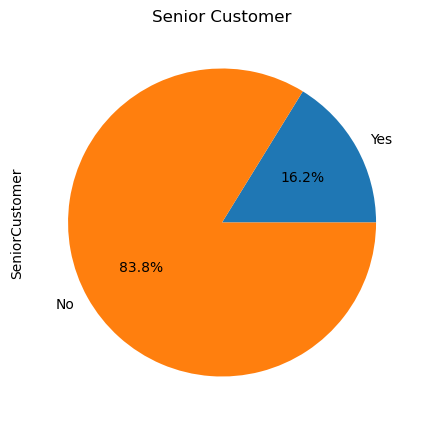

In [5]:
#% of customers of customers by age
ax = (df['SeniorCitizen'].value_counts().sort_values()* 100/ len(df)).plot.pie(autopct='%.1f%%',labels= ['Yes', 'No'],
                                                                                fontsize= 10, figsize=(5,5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('SeniorCustomer' ,fontsize= 10)
ax.set_title('Senior Customer')

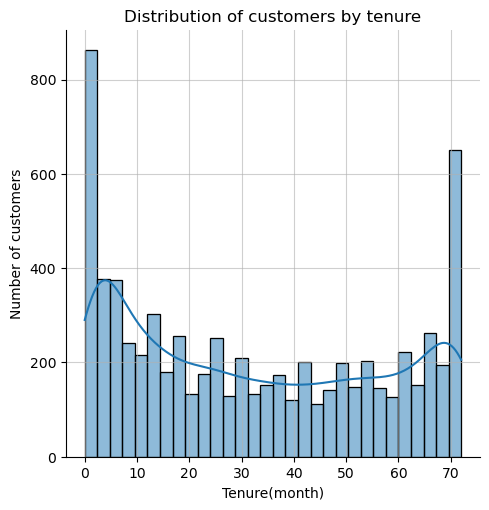

<Figure size 640x480 with 0 Axes>

In [6]:
#Distribution of customers by tenure(period)
ax = sns.displot(df['tenure'], kind='hist', kde=True,
                 bins= 30)

ax.set_ylabels('Number of customers')
ax.set_xlabels('Tenure(month)')
plt.title('Distribution of customers by tenure')
plt.grid(alpha= 0.6)
plt.show()
plt.tight_layout()

From the above distribution it is seen that a lot of customers use the the company for a period of 1 month, quite many more use for 70 months.This could be due to the contract one has opted to take. I.e for customers with 1 year contracts would tend to stay longer compared to those with month-month contract.

Text(0.5, 1.0, 'Customers by contract type')

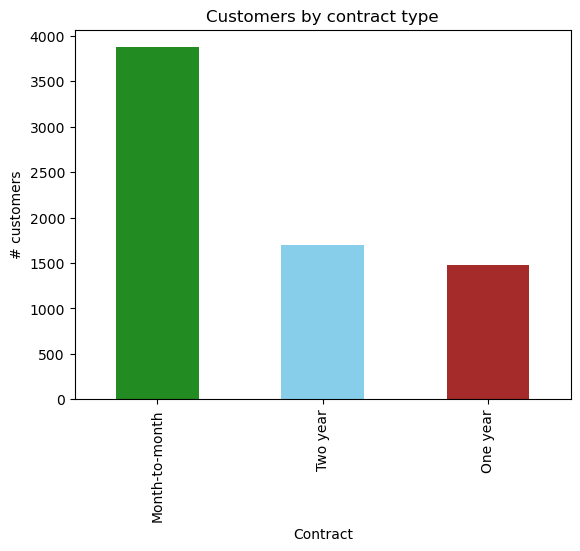

In [7]:
#checking the number of customers by the type of contract
ax= df['Contract'].value_counts().plot(kind='bar', color= ['forestgreen', 'skyblue', 'brown'])
ax.set_ylabel('# customers')
ax.set_title('Customers by contract type')

As seen in the above graph most of the customers are in the month-to-month plan while the two year plan and the one year plan share almost equal numbers of customers.
Below we now understand the distribution fo customer tenure based on the contract type.

Text(0.5, 0, 'Tenure(months)')

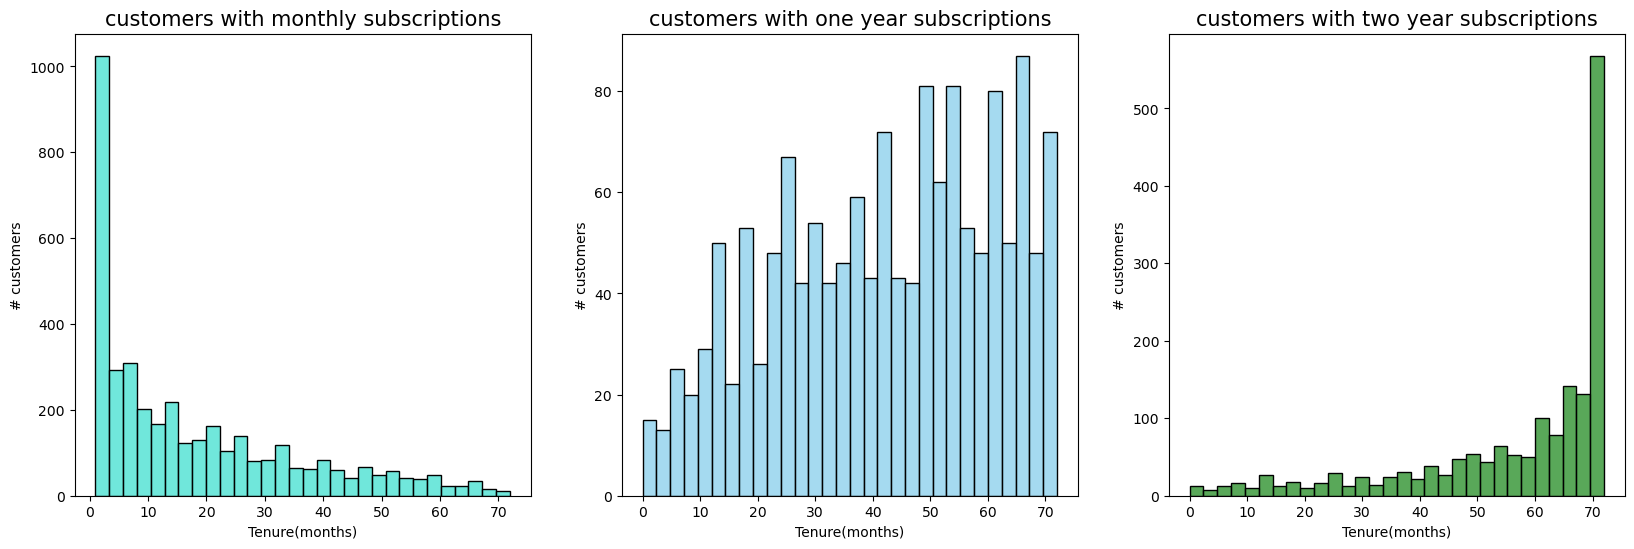

In [8]:
#checking customer tenure based on the contracts
fig, (ax1,ax2,ax3)= plt.subplots(1,3, figsize= (20,6))

ax= sns.histplot(df[df['Contract']== 'Month-to-month']['tenure'], color= 'turquoise', bins=30, ax=ax1)
ax.set_title('customers with monthly subscriptions', fontsize= 15)
ax.set_ylabel('# customers')
ax.set_xlabel('Tenure(months)')

ax= sns.histplot(df[df['Contract']== 'One year']['tenure'], color= 'skyblue', bins=30, ax=ax2)
ax.set_title('customers with one year subscriptions', fontsize= 15)
ax.set_ylabel('# customers')
ax.set_xlabel('Tenure(months)')

ax= sns.histplot(df[df['Contract']== 'Two year']['tenure'], color= 'forestgreen', bins=30, ax=ax3)
ax.set_title('customers with two year subscriptions', fontsize=15)
ax.set_ylabel('# customers')
ax.set_xlabel('Tenure(months)')

Text(0.5, 0, 'Tenure(month)')

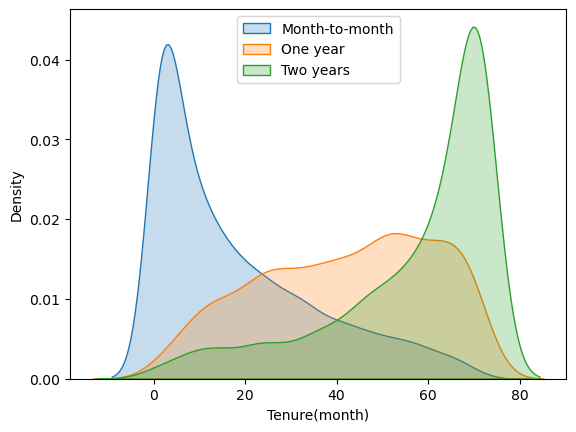

In [9]:
ax= sns.kdeplot(df[df['Contract']== 'Month-to-month']['tenure'], fill= True, label='Month-to-month')
ax= sns.kdeplot(df[df['Contract']== 'One year']['tenure'], fill=True, label= 'One year')
ax= sns.kdeplot(df[df['Contract']== 'Two year']['tenure'], fill= True, label= 'Two years')
ax.legend(loc= 'upper center')
ax.set_xlabel('Tenure(month)')


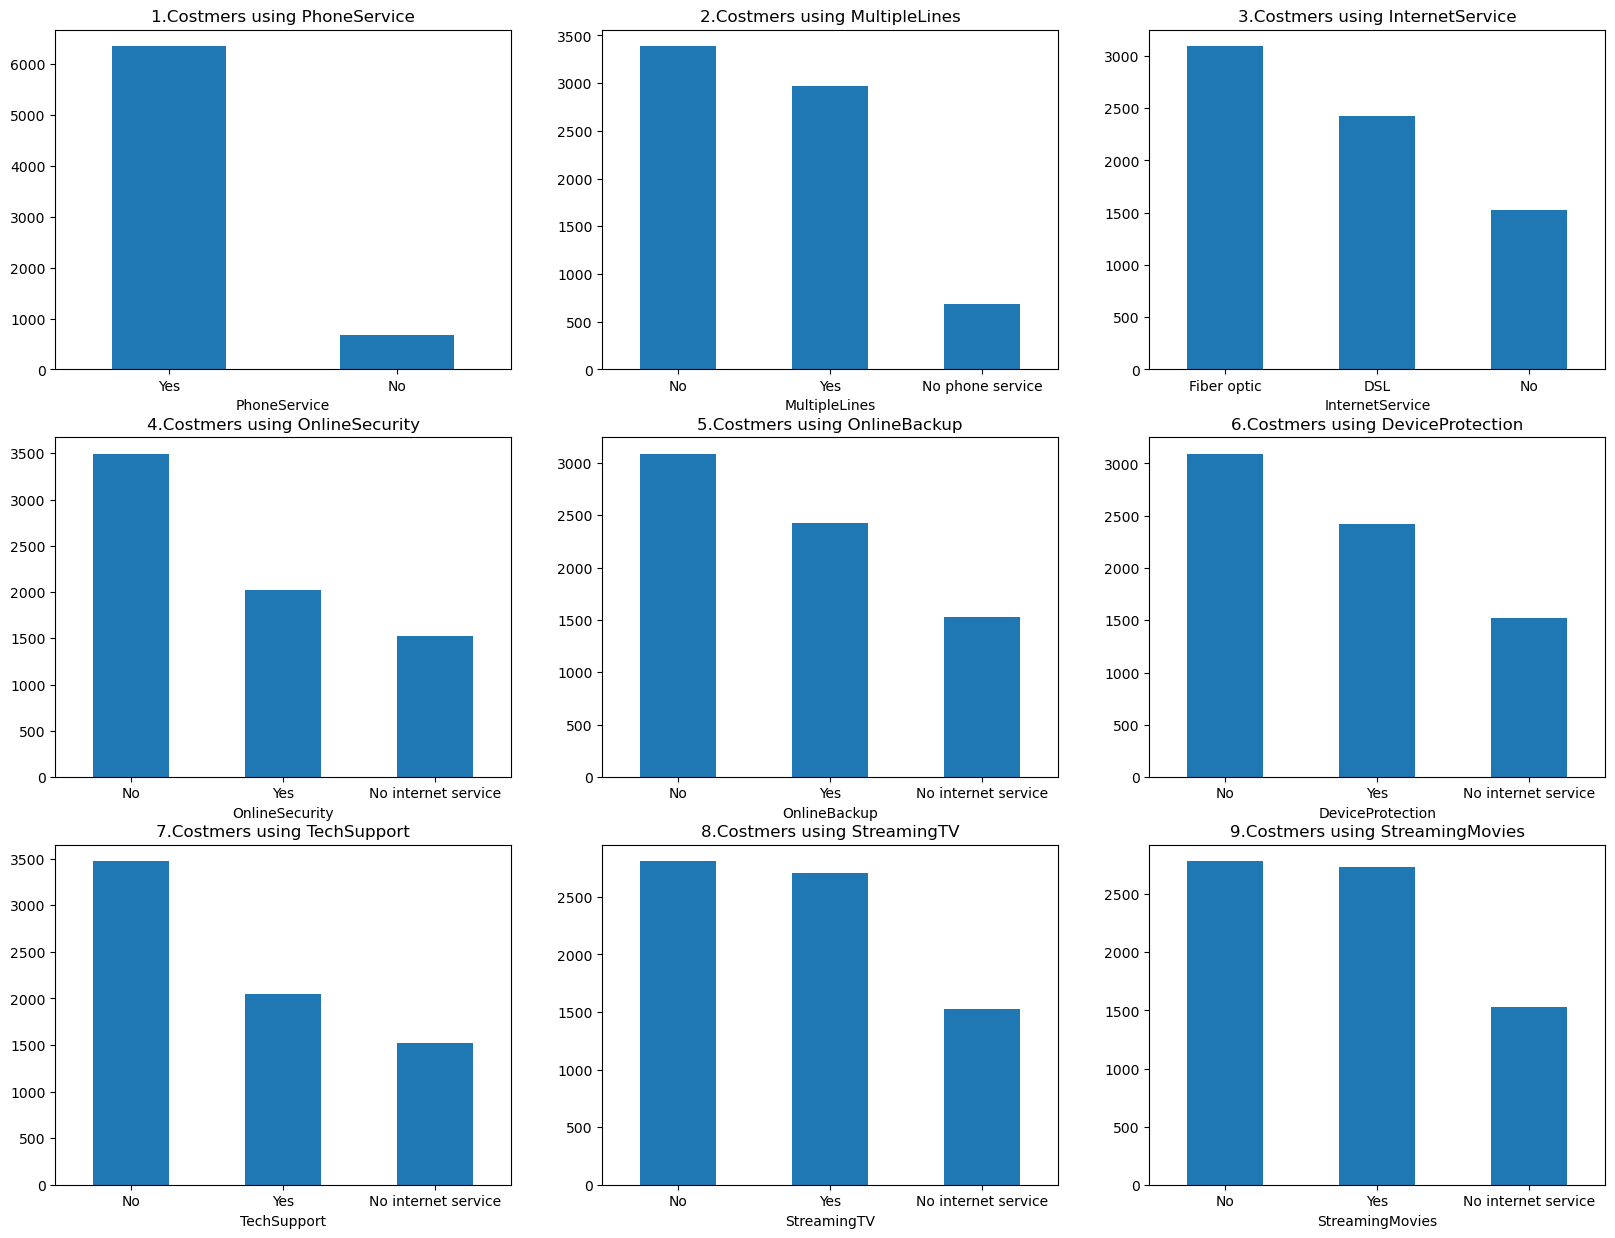

<Figure size 640x480 with 0 Axes>

In [10]:
#Distribution of services used by diff customers.
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(3,3 ,figsize=(20,15))
axes = axes.flatten()

for i, (ax, item) in enumerate(zip(axes, services)):
    df[item].value_counts().plot(kind= 'bar', ax=ax, rot=0)
    ax.set_title(f"{i +1 }.Costmers using {item}")
    #ax.set_xlabel(item)
plt.show( )
plt.tight_layout()

Interactions between the predictor varible(churn) and the other variaables

Text(0.5, 1.0, 'Churn Rate')

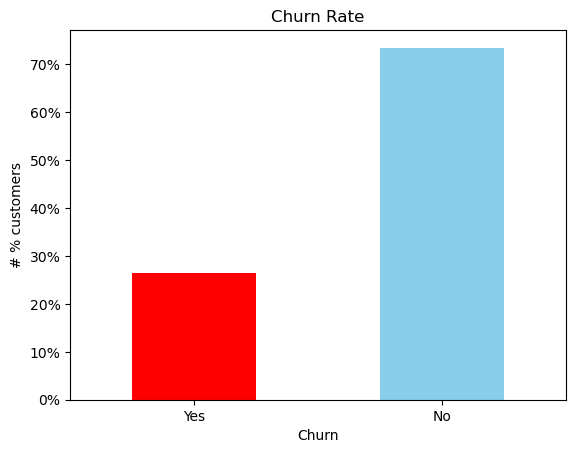

In [11]:
#churn rate 
ax = (df['Churn'].value_counts().sort_values() *100/ len(df)).plot(kind='bar', color=['red', 'skyblue'], rot=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('# % customers')
ax.set_title('Churn Rate')

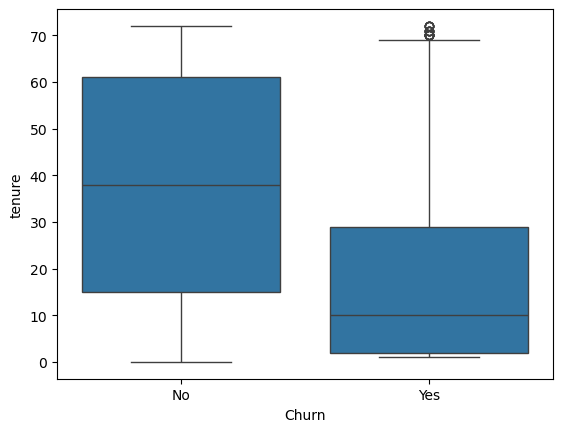

In [12]:
ax = sns.boxplot(x =df['Churn'], y= df['tenure'])

The plot above shows that customers who are not likely to churn to have a longer tunure

Text(0.5, 1.0, 'Distribution of monthly charge by churn')

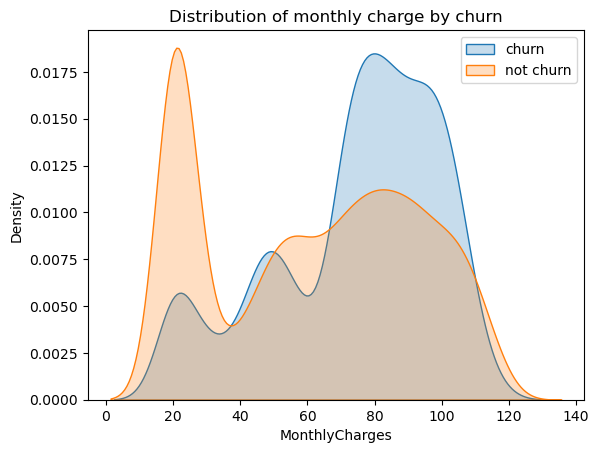

In [13]:
ax= sns.kdeplot(df[df['Churn']== 'Yes']['MonthlyCharges'],fill=True)
ax= sns.kdeplot(df[df['Churn']== 'No']['MonthlyCharges'],fill=True)
ax.legend(['churn', 'not churn'], loc='best')
ax.set_title('Distribution of monthly charge by churn')

It is quite certain that when the monthly churges are low, customers tend not to churn, when the monthly charges are high a higher number churn

In [14]:
#converting the column to a number
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors= 'coerce')

Text(0.5, 1.0, 'Distribution of Total Charge by churn')

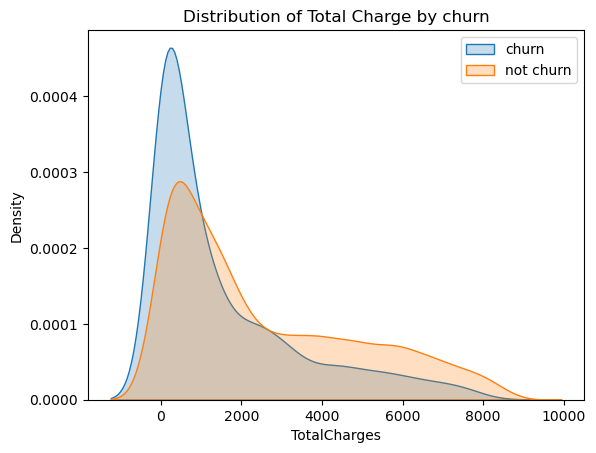

In [15]:
#ploting the distriution of total charge by churn
ax= sns.kdeplot(df[df['Churn']== 'Yes']['TotalCharges'],fill=True)
ax= sns.kdeplot(df[df['Churn']== 'No']['TotalCharges'],fill=True)
ax.legend(['churn', 'not churn'], loc='best')
ax.set_title('Distribution of Total Charge by churn')

seems there is a higher churn when the total charge is low